# Redes neuronales en Keras

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

## Precarga de los datos utilizando Keras

In [7]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
x_test.shape

(10000, 28, 28)

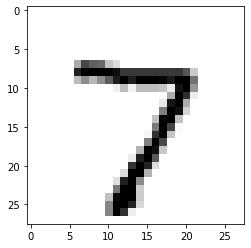

In [10]:

plt.imshow(x_test[0],cmap='gray_r')

In [4]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:

#x_train[400]

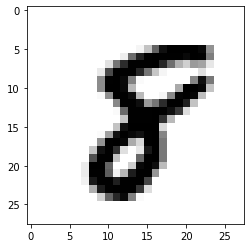

In [14]:
plt.imshow(x_train[777],cmap="binary")
plt.show()

In [15]:
print(y_train[777])

8


In [13]:
print(x_train.shape)

(60000, 28, 28)


## Procesamiento de los datos de entrada en una red neuronal

In [16]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [17]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255
x_test / 255

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [19]:
x_train[0].shape

(28, 28)

In [21]:
x_train[0].flatten().shape

(784,)

In [24]:
x_train[0].reshape(784).shape

(784,)

In [30]:
500*800

400000

In [25]:
x_train.shape

(60000, 28, 28)

In [26]:
#FLATTEN

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [27]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [17]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [18]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [19]:
len(y_test[0])

10

In [20]:
print(y_train[3])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [21]:
print(y_train.shape)

(60000, 10)


In [22]:
print(y_test.shape)

(10000, 10)


## Creación del modelo

In [41]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(15, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 15)                11775     
                                                                 
 dense_8 (Dense)             (None, 10)                160       
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
Total params: 12,045
Trainable params: 12,045
Non-trainable params: 0
_________________________________________________________________


## Configuración del proceso de aprendizaje

In [43]:
model.compile(loss="CategoricalCrossentropy",
              optimizer="sgd",
              metrics = ['accuracy'])

## Entrenamiento del modelo

In [44]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3110 - accuracy: 0.1054
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3015 - accuracy: 0.1124
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3015 - accuracy: 0.1124
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3015 - accuracy: 0.1124
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3015 - accuracy: 0.1124
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3015 - accuracy: 0.1124
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3015 - accuracy: 0.1124
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3015 - accuracy: 0.1124
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.301

## Evaluación del modelo

In [27]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.2927 - accuracy: 0.1319


In [28]:
print('Test accuracy:', test_acc)

Test accuracy: 0.13189999759197235


In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

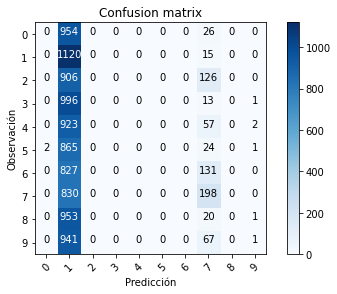

In [30]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = range(10))

## Generación de predicciones

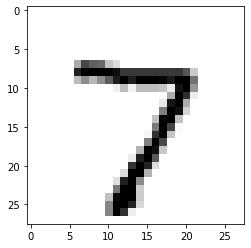

In [31]:
x_test_old = x_test.reshape(10000, 28,28)
plt.imshow(x_test_old[0], cmap=plt.cm.binary)

In [32]:
predictions = model.predict(x_test)
len(predictions)

10000

In [33]:
print(predictions[0])

[0.09701216 0.11219036 0.09860462 0.1008447  0.10001377 0.0882289
 0.0966531  0.11216747 0.09648569 0.09779927]


In [34]:
np.argmax(predictions[0])

1

In [35]:
print(predictions[0])

[0.09701216 0.11219036 0.09860462 0.1008447  0.10001377 0.0882289
 0.0966531  0.11216747 0.09648569 0.09779927]


In [36]:
np.sum(predictions[0])

1.0